### Evaluation Project -2

## Importing Libraries

In [83]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

## Importing dataset 

In [84]:
df=pd.read_csv(r'C:\Users\rk1066\Downloads\flip\GITHUB\Data Trained\evaluation_project_data_trained\avocado.csv\avocado.csv')

In [85]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [86]:
# checking the column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [87]:
# Unnamed columns contains the serial no which is not required for analysis, hence dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [88]:
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [89]:
# Checking for the shape of the dataset
df.shape

(18249, 13)

In [90]:
# weremain with 18249 rows and 13 columns

In [91]:
# Checking for the null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [92]:
# we have 0 null values in the dataset

In [93]:
# checking for the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [94]:
# we have 3 fields as objects and 9 flot type

In [95]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [96]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [97]:
# Thus all the null values have been filled and now we can proceed for EDA

## EDA

In [98]:
# Comparative analysis to check the highest sales by year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

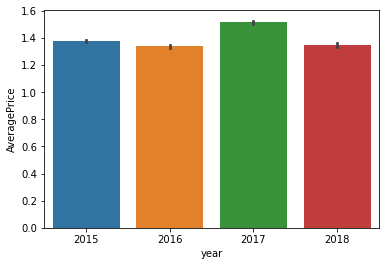

In [99]:
sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

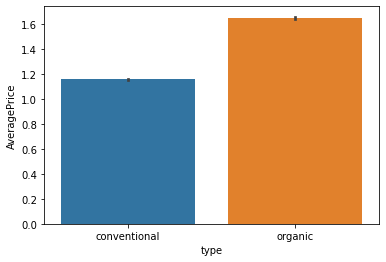

In [100]:
# Checking the data distribution as per type
sns.barplot(x="type",y="AveragePrice",data=df)

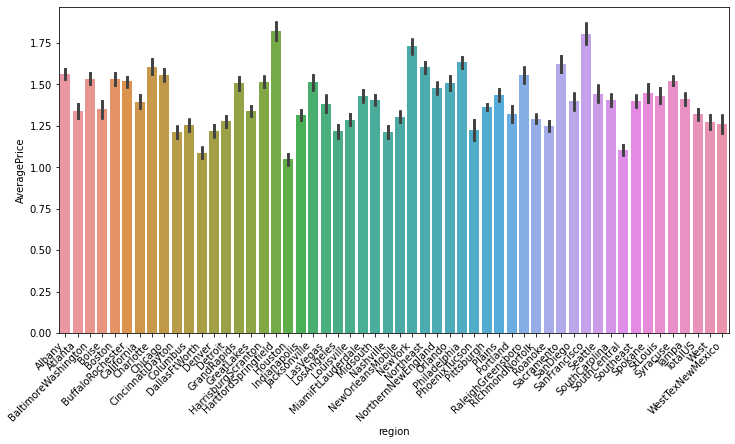

In [103]:
# Checking the data distribution as per region
plt.figure(figsize=(12, 6))
sns.barplot(x="region",y="AveragePrice",data=df,orient="v")
ax = sns.barplot(x="region",y="AveragePrice",data=df,orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel('AveragePrice')
plt.show()


In [104]:
# Dropping the type, region and date columns which are not requred for linear regression
df.drop(["type","region","Date"],axis=1,inplace=True)

In [105]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015


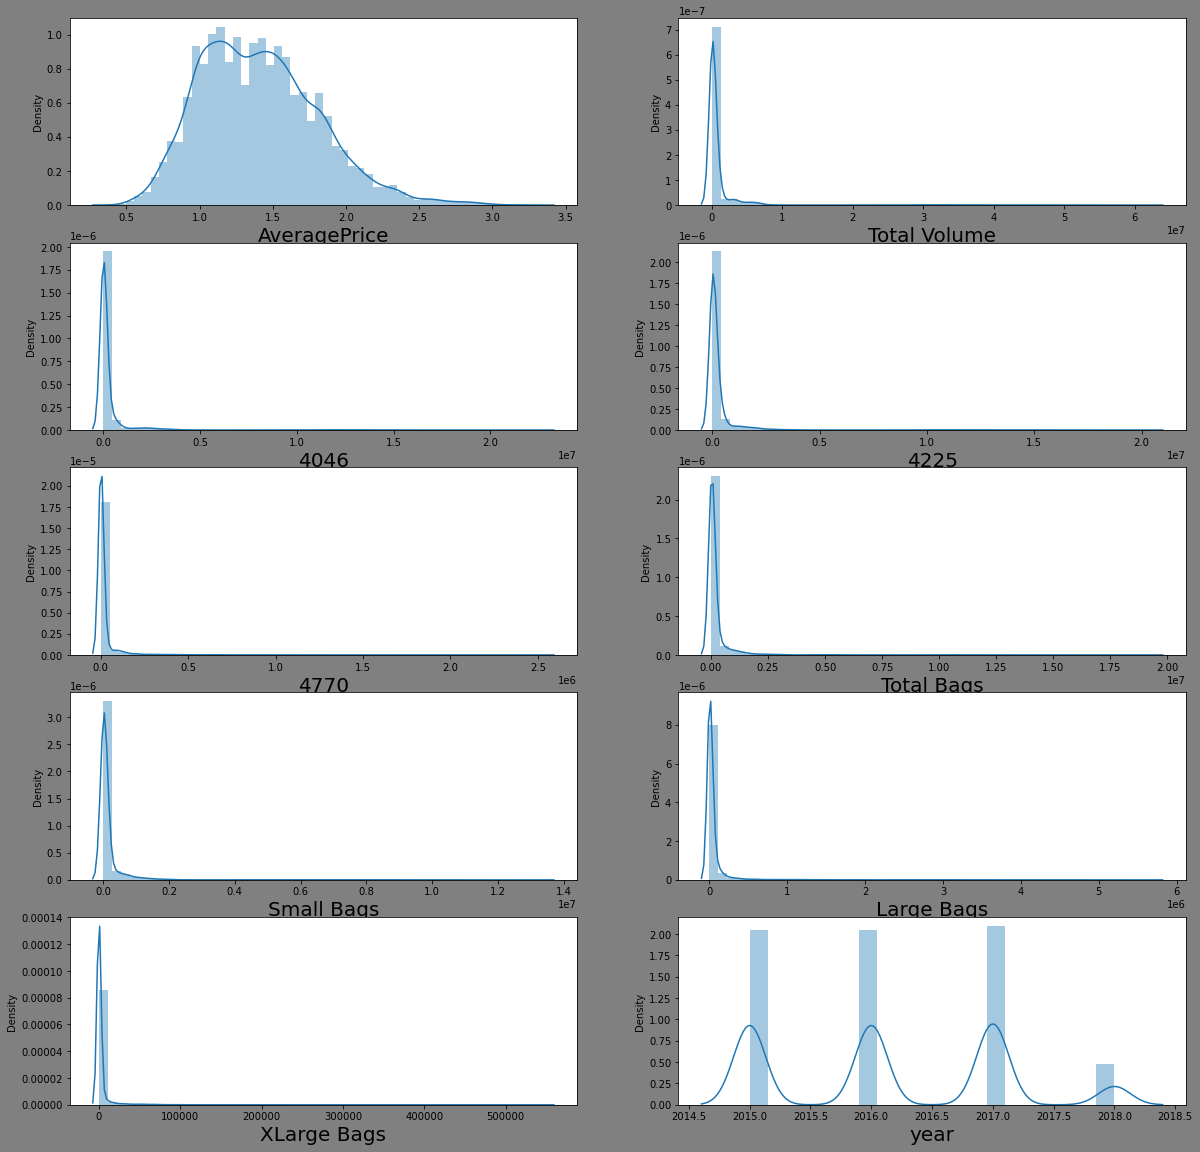

In [106]:
# Checking distribution for each column
plt.figure(figsize=(20,20), facecolor ='grey')
pltnumber=1

for column in df:
    if pltnumber<=10:
        ax = plt.subplot(5,2,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltnumber +=1
plt.show()  #plt.show()

In [107]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

AveragePrice       AxesSubplot(0.125,0.749828;0.352273x0.130172)
Total Volume    AxesSubplot(0.547727,0.749828;0.352273x0.130172)
4046               AxesSubplot(0.125,0.593621;0.352273x0.130172)
4225            AxesSubplot(0.547727,0.593621;0.352273x0.130172)
4770               AxesSubplot(0.125,0.437414;0.352273x0.130172)
Total Bags      AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Small Bags         AxesSubplot(0.125,0.281207;0.352273x0.130172)
Large Bags      AxesSubplot(0.547727,0.281207;0.352273x0.130172)
XLarge Bags           AxesSubplot(0.125,0.125;0.352273x0.130172)
year               AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

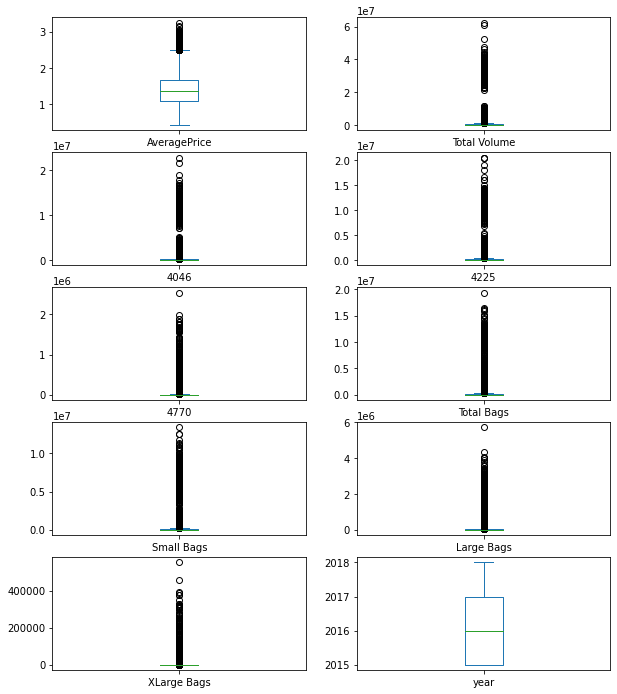

In [108]:
# Checking for the outliers
df.plot(kind="box",subplots=True,layout=(5,2),figsize=(10,12))



## Handling Outliers

In [109]:
# using z score method to remove outliers
# importing z score from scipy stats
from scipy.stats import zscore

In [110]:
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,1.221282
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,1.221282
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,1.221282
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,1.221282
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,1.221282
...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.970504
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.970504
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.970504
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.970504


In [111]:
#setting the threshold value at 3
threshold=3
df_new=df[(z<3).all(axis=1)]

In [112]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [113]:
df.shape

(18249, 10)

In [114]:
df_new.shape

(17651, 10)

In [115]:
# Percentage loss

p_loss=(18249-17651)/17651*100

In [116]:
p_loss

3.3879100334258685

In [117]:
# Feature selection
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [118]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [119]:
# Removing skewness from the columns using power transform method
#importing power transform from sklearn library
from sklearn.preprocessing import power_transform

In [120]:
x=power_transform(x,method="yeo-johnson")
x

array([[-0.08660524, -0.65861896,  0.30731294, ..., -0.77335071,
        -0.69984934, -1.22189489],
       [-0.15574567, -0.77686953,  0.23164739, ..., -0.76343481,
        -0.69984934, -1.22189489],
       [ 0.17932662, -0.73194656,  0.57950332, ..., -0.75081989,
        -0.69984934, -1.22189489],
       ...,
       [-0.77150535, -0.61983119, -0.77249619, ..., -0.94348631,
        -0.69984934,  1.96854784],
       [-0.69807719, -0.55028196, -0.71054316, ..., -0.90851023,
        -0.69984934,  1.96854784],
       [-0.66380937, -0.36790819, -0.78517306, ..., -1.0422502 ,
        -0.69984934,  1.96854784]])

In [121]:
# Scaling the data using standard scalar
x_scaled=StandardScaler().fit_transform(x)
print(x_scaled)

[[-0.08660524 -0.65861896  0.30731294 ... -0.77335071 -0.69984934
  -1.22187884]
 [-0.15574567 -0.77686953  0.23164739 ... -0.76343481 -0.69984934
  -1.22187884]
 [ 0.17932662 -0.73194656  0.57950332 ... -0.75081989 -0.69984934
  -1.22187884]
 ...
 [-0.77150535 -0.61983119 -0.77249619 ... -0.94348631 -0.69984934
   1.96856389]
 [-0.69807719 -0.55028196 -0.71054316 ... -0.90851023 -0.69984934
   1.96856389]
 [-0.66380937 -0.36790819 -0.78517306 ... -1.0422502  -0.69984934
   1.96856389]]


In [122]:
# Builing maching learning model
# Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score


In [123]:
# finding the best random state number
best_rstate=0
accu=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predmod=mod.predict(x_test)
    tempaccu=r2_score(y_test,predmod)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f" best accuracy={accu*100} found on random_state{best_rstate}")
print("mean squared error:",mean_squared_error(y_test,predmod))
print("mean absolute error:",mean_absolute_error(y_test,predmod))

 best accuracy=49.22082511559238 found on random_state376
mean squared error: 0.08774633389045264
mean absolute error: 0.22996773369429446


### Training the model

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=376)

### Finding the best model

In [126]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
cvscore=cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,preddtr))
print("mean absolute error:",mean_absolute_error(y_test,preddtr))

 accuracy=63.217526201104256,cross val score=56.854444689357706 & difference=6.36308151174655
mean squared error: 0.059871068493150686
mean absolute error: 0.15948310502283103


In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
r2score=r2_score(y_test,predgbr)
cvscore=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,predgbr))
print("mean absolute error:",mean_absolute_error(y_test,predgbr))

 accuracy=63.55254006098596,cross val score=61.96008766860146 & difference=1.5924523923845015
mean squared error: 0.059325764284934676
mean absolute error: 0.1838109277812808


In [128]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
cvscore=cross_val_score(KNeighborsRegressor(),x_train,y_train,cv=3).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error:",mean_squared_error(y_test,predknn))
print("mean absolute error:",mean_absolute_error(y_test,predknn))

 accuracy=79.58935659902791,cross val score=75.97991996882682 & difference=3.6094366302010883
mean squared error: 0.033222535159817344
mean absolute error: 0.1229731506849315


In [129]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f" accuracy={r2score*100},cross val score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")
print("mean squared error=",mean_squared_error(y_test,predad))
print("mean absolute error=",mean_absolute_error(y_test,predad))

 accuracy=40.23309257497305,cross val score=42.753092888529274 & difference=-2.520000313556224
mean squared error= 0.09728297850850395
mean absolute error= 0.25482718740369786


##### KNeighborsRegressor gives the best score of R2 as well as cross validation score
# accuracy= 79.5 % & cross val score of 75.97 %

In [130]:
#saving the file
import pickle
filename="Avacado_price prediction.pkl"
pickle.dump(knn,open(filename,"wb"))

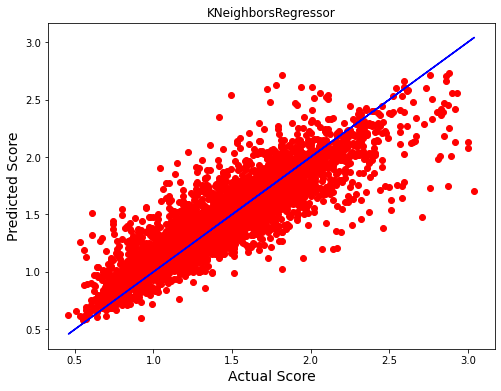

In [131]:
# Plotting knn regressor
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predknn,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Score",fontsize=14)
plt.ylabel("Predicted Score",fontsize=14)
plt.title("KNeighborsRegressor")
plt.show()